# Imports

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

# Load

In [2]:
data = pd.read_csv("data/data_cleaned.csv")

# Data Preparation

In [3]:
# one hot
data = pd.get_dummies(data, prefix = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"], columns = ["HEAT", "AC", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "INTWALL", "ROOF", "ASSESSMENT_SUBNBHD"])
# split
x_data = data.drop(["PRICE"], axis=1)
y_data = data["PRICE"]
# normalization
x_data = x_data.astype(float)
x_data = x_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# train & test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

# Bagging Regressor

In [4]:
model = BaggingRegressor(n_estimators=500, n_jobs=-1, oob_score=True)
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\anaconda3\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: C:\Users\D070760\AppData\Local\Temp\joblib_memmaping_pool_8716_1884937044544
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


0.8266807363735819

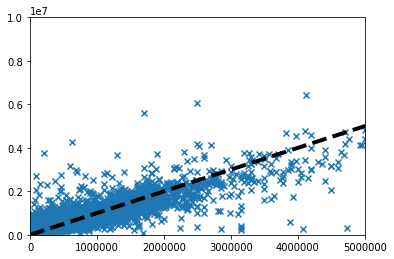

In [5]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='x')
plt.xlim(0, 5e6)
plt.ylim(0, 1e7)
ax.plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=4)
plt.show()

# Save prediction

In [6]:
pred_train = model.predict(x_train)
pd.DataFrame(pred_train).to_csv("predictions/bagging.csv", index=False)
pd.DataFrame(y_pred).to_csv("predictions/bagging_test.csv", index=False)